In [72]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [19]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "../Plantvillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[1 0 1 2 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
    

tf.Tensor(
[[[173. 176. 193.]
  [166. 169. 186.]
  [168. 171. 188.]
  ...
  [195. 197. 210.]
  [172. 174. 187.]
  [ 70.  72.  85.]]

 [[166. 169. 186.]
  [166. 169. 186.]
  [169. 172. 189.]
  ...
  [156. 158. 171.]
  [145. 147. 160.]
  [182. 184. 197.]]

 [[164. 167. 184.]
  [171. 174. 191.]
  [174. 177. 194.]
  ...
  [143. 145. 158.]
  [163. 165. 178.]
  [120. 122. 135.]]

 ...

 [[180. 182. 194.]
  [175. 177. 189.]
  [172. 174. 186.]
  ...
  [187. 184. 195.]
  [106. 103. 114.]
  [152. 149. 160.]]

 [[176. 178. 190.]
  [168. 170. 182.]
  [165. 167. 179.]
  ...
  [109. 106. 117.]
  [147. 144. 155.]
  [152. 149. 160.]]

 [[167. 169. 181.]
  [159. 161. 173.]
  [157. 159. 171.]
  ...
  [146. 143. 154.]
  [136. 133. 144.]
  [ 98.  95. 106.]]], shape=(256, 256, 3), dtype=float32)


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    

[[[156. 159. 176.]
  [163. 166. 183.]
  [167. 170. 187.]
  ...
  [146. 143. 160.]
  [107. 104. 121.]
  [ 87.  84. 101.]]

 [[161. 164. 181.]
  [168. 171. 188.]
  [171. 174. 191.]
  ...
  [209. 206. 223.]
  [111. 108. 125.]
  [162. 159. 176.]]

 [[167. 170. 187.]
  [172. 175. 192.]
  [173. 176. 193.]
  ...
  [120. 117. 136.]
  [ 98.  95. 114.]
  [158. 155. 174.]]

 ...

 [[171. 169. 182.]
  [171. 169. 182.]
  [167. 165. 178.]
  ...
  [160. 156. 171.]
  [138. 134. 149.]
  [150. 146. 161.]]

 [[168. 166. 179.]
  [165. 163. 176.]
  [160. 158. 171.]
  ...
  [118. 114. 129.]
  [143. 139. 154.]
  [118. 114. 129.]]

 [[168. 166. 179.]
  [165. 163. 176.]
  [159. 157. 170.]
  ...
  [110. 106. 121.]
  [132. 128. 143.]
  [117. 113. 128.]]]


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
    

(256, 256, 3)


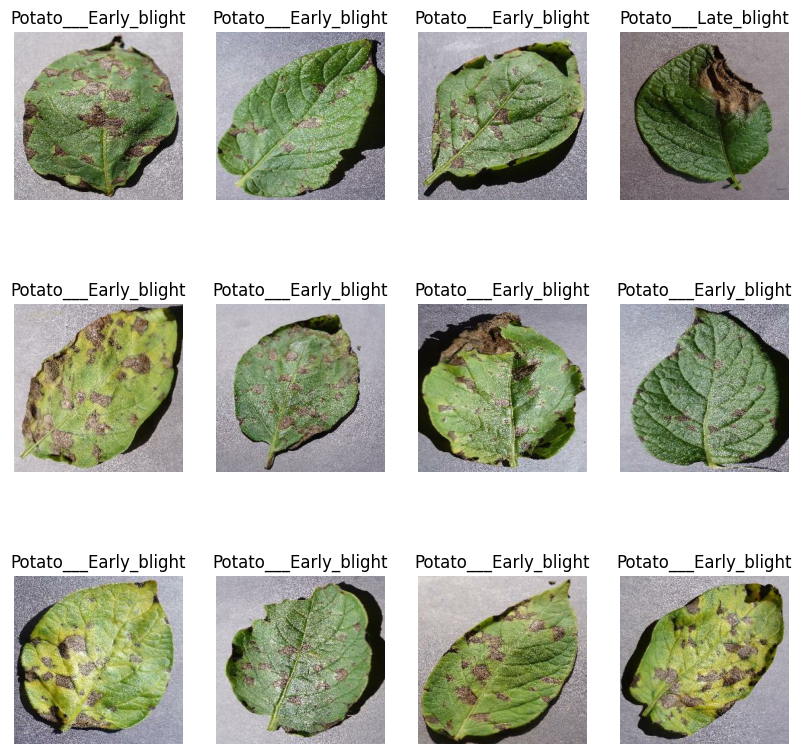

In [17]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

    

In [18]:
len(dataset
    )

68

In [20]:
80% == > training
20% == > 10% validation , 10% testing

SyntaxError: invalid syntax (2185471162.py, line 1)

In [21]:
train_size=0.8
len(dataset) * train_size

54.400000000000006

In [23]:
train_ds = dataset.take(54)
len(train_ds)

54

In [25]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [26]:
val_size=0.1
len(dataset) * val_size

6.800000000000001

In [29]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [33]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [34]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [35]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [36]:
len(train_ds)

54

In [37]:
len(val_ds)
len(test_ds)

8

In [38]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

In [40]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

In [42]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical", input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    tf.keras.layers.Rescaling(1./255)
])

C:\Users\DESHANHN\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu' , input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

C:\Users\DESHANHN\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (32, 60, 60, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (32, 30, 30, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 28, 28, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 14, 14, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (32, 50176)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 256)              │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 3)                │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,234,499 (50.49 MB)

 Trainable params: 13,234,499 (50.49 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [49]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 909ms/step - accuracy: 0.6343 - loss: 0.8368 - val_accuracy: 0.8333 - val_loss: 0.4100
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 842ms/step - accuracy: 0.8247 - loss: 0.4361 - val_accuracy: 0.7969 - val_loss: 0.4382
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 882ms/step - accuracy: 0.8657 - loss: 0.3290 - val_accuracy: 0.8281 - val_loss: 0.4545
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8912 - loss: 0.2724 - val_accuracy: 0.8594 - val_loss: 0.3115
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9196 - loss: 0.2086 - val_accuracy: 0.7969 - val_loss: 0.5204
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 982ms/step - accuracy: 0.9502 - loss: 0.1463 - val_accuracy: 0.8802 - val_loss: 0.2618
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 994ms/step - accuracy: 0.9612 - loss: 0.1098 - val_accuracy: 0.8594 - val_loss: 0.5143
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9537 - loss: 0.1211 - val_accuracy: 0.7

In [51]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.9688 - loss: 0.1211


In [52]:
scores


[0.12111546099185944, 0.96875]

In [53]:
history.history

{'accuracy': [0.6342592835426331,
  0.8246527910232544,
  0.8657407164573669,
  0.8912037014961243,
  0.9195601940155029,
  0.9502314925193787,
  0.9612268805503845,
  0.9537037014961243,
  0.9438657164573669,
  0.9444444179534912,
  0.9670138955116272,
  0.9664351940155029,
  0.9600694179534912,
  0.9508101940155029,
  0.9658564925193787,
  0.9646990895271301,
  0.9646990895271301,
  0.9722222089767456,
  0.9658564925193787,
  0.9467592835426331,
  0.9756944179534912,
  0.9658564925193787,
  0.9739583134651184,
  0.9797453880310059,
  0.9716435074806213,
  0.9467592835426331,
  0.9623842835426331,
  0.9826388955116272,
  0.9809027910232544,
  0.9785879850387573,
  0.9768518805503845,
  0.9641203880310059,
  0.9785879850387573,
  0.9826388955116272,
  0.984375,
  0.9780092835426331,
  0.9618055820465088,
  0.9855324029922485,
  0.9866898059844971,
  0.9803240895271301,
  0.9762731194496155,
  0.9861111044883728,
  0.9837962985038757,
  0.9849537014961243,
  0.9866898059844971,
  0.9814

In [54]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [55]:
history.history['accuracy']

[0.6342592835426331,
 0.8246527910232544,
 0.8657407164573669,
 0.8912037014961243,
 0.9195601940155029,
 0.9502314925193787,
 0.9612268805503845,
 0.9537037014961243,
 0.9438657164573669,
 0.9444444179534912,
 0.9670138955116272,
 0.9664351940155029,
 0.9600694179534912,
 0.9508101940155029,
 0.9658564925193787,
 0.9646990895271301,
 0.9646990895271301,
 0.9722222089767456,
 0.9658564925193787,
 0.9467592835426331,
 0.9756944179534912,
 0.9658564925193787,
 0.9739583134651184,
 0.9797453880310059,
 0.9716435074806213,
 0.9467592835426331,
 0.9623842835426331,
 0.9826388955116272,
 0.9809027910232544,
 0.9785879850387573,
 0.9768518805503845,
 0.9641203880310059,
 0.9785879850387573,
 0.9826388955116272,
 0.984375,
 0.9780092835426331,
 0.9618055820465088,
 0.9855324029922485,
 0.9866898059844971,
 0.9803240895271301,
 0.9762731194496155,
 0.9861111044883728,
 0.9837962985038757,
 0.9849537014961243,
 0.9866898059844971,
 0.9814814925193787,
 0.9791666865348816,
 0.9820601940155029,
 0

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

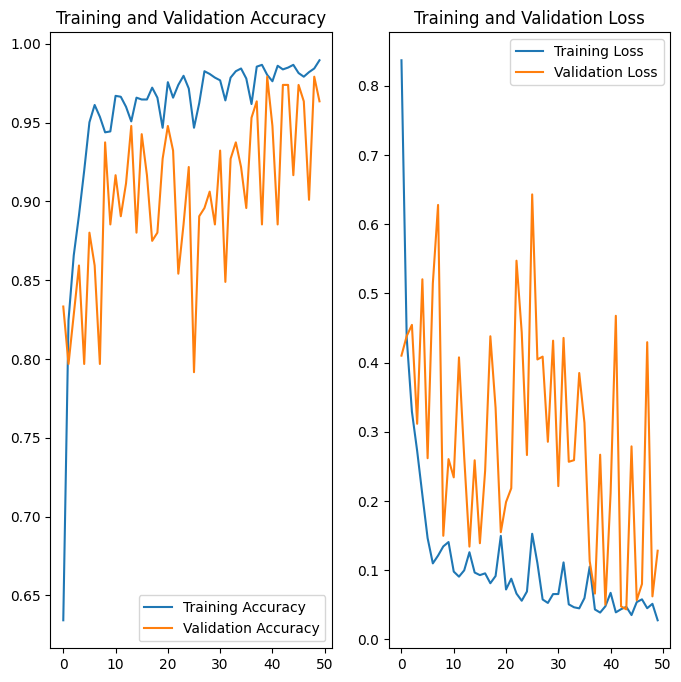

In [58]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First image to predict:
 actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
predicted label: Potato___Early_blight


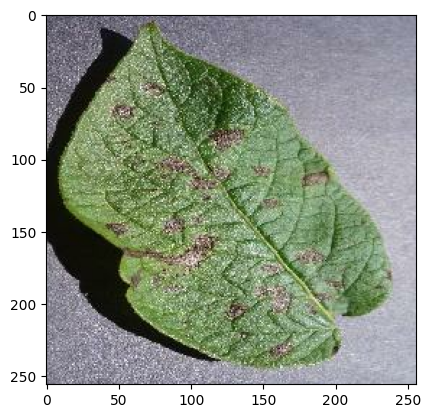

In [81]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0]

    print("First image to predict:")
    plt.imshow(first_image)
    print(" actual label:", class_names[first_label])


    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [82]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = [class_names[np.argmax(predictions[0])]]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


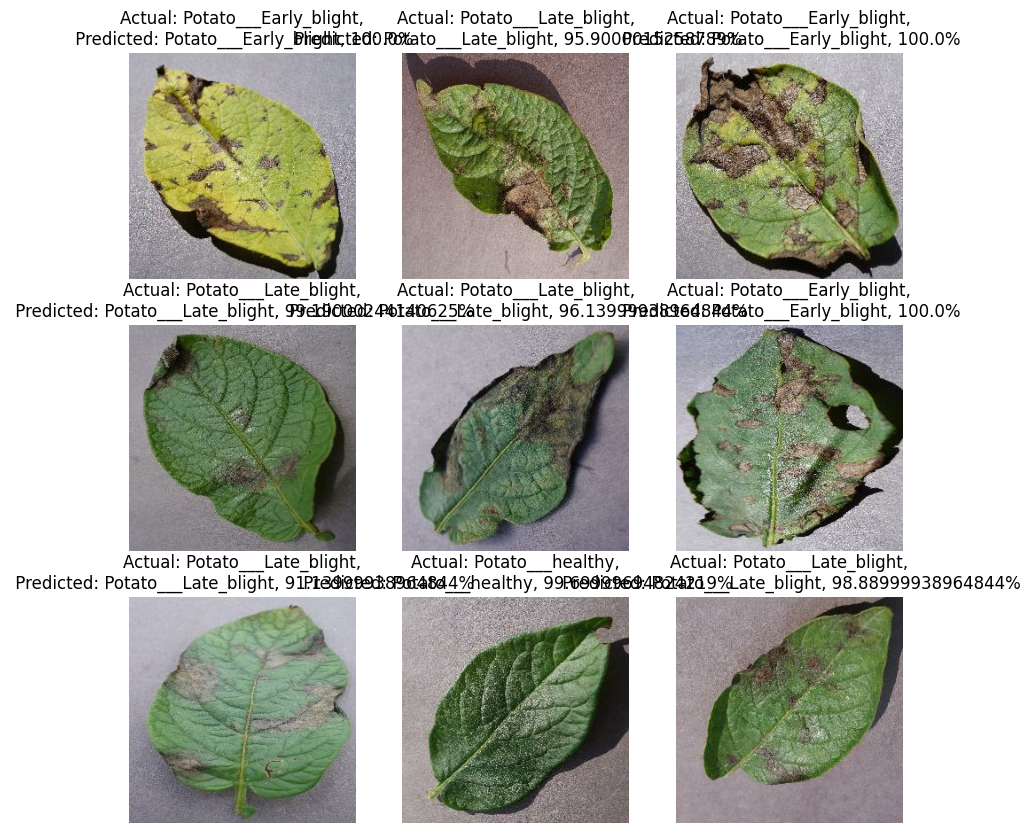

In [91]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
   
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class[0]}, {confidence}%")

        plt.axis("off")

In [98]:
model_version = 1.0
model.save(f"../models/{model_version}.keras")